# Reto 02
A continuación vas a desarrollar por tu propia cuenta una clusterización pero ahora con un dataset con el doble de dimensiones. Contarás con el apoyo de los TA y el Experto para que puedas desarrollar el reto que a continuación vas a resolver. Lee a detalle cada una de las instrucciones contenidas en cada paso. Éxito.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2003.%20Clusterizaci%C3%B3n/Reto%2002/wine-challenge.csv")
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Color_Intensity
0,14.23,1.71,2.43,15.6,127,5.64
1,13.20,1.78,2.14,11.2,100,4.38
2,13.16,2.36,2.67,18.6,101,5.68
3,14.37,1.95,2.50,16.8,113,7.80
4,13.24,2.59,2.87,21.0,118,4.32


# Paso 1: Genera un Análisis Exploratorio básico de las variables con las que cuentas, tratandos de responder las siguientes preguntas
- Cuantas variables tienes y de que tipo son
- Como se distirbuyen tus variables
- Cuantas observaciones tienes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          99 non-null     float64
 1   Malic_Acid       99 non-null     float64
 2   Ash              99 non-null     float64
 3   Ash_Alcanity     99 non-null     float64
 4   Magnesium        99 non-null     int64  
 5   Color_Intensity  99 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


In [13]:
df.isnull().sum().sort_values(ascending=False)

Color_Intensity    0
Magnesium          0
Ash_Alcanity       0
Ash                0
Malic_Acid         0
Alcohol            0
dtype: int64

In [14]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Color_Intensity
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,12.985253,1.958485,2.340101,18.764646,100.414141,4.253434
std,0.865526,0.887749,0.280970,3.476108,15.701950,1.598098
min,11.030000,0.890000,1.360000,10.600000,70.000000,1.280000
25%,12.290000,1.500000,2.195000,16.550000,88.000000,2.900000
50%,13.050000,1.710000,2.320000,18.000000,98.000000,4.250000
75%,13.745000,2.055000,2.505000,20.900000,108.000000,5.415000
max,14.830000,5.800000,3.230000,30.000000,162.000000,8.900000


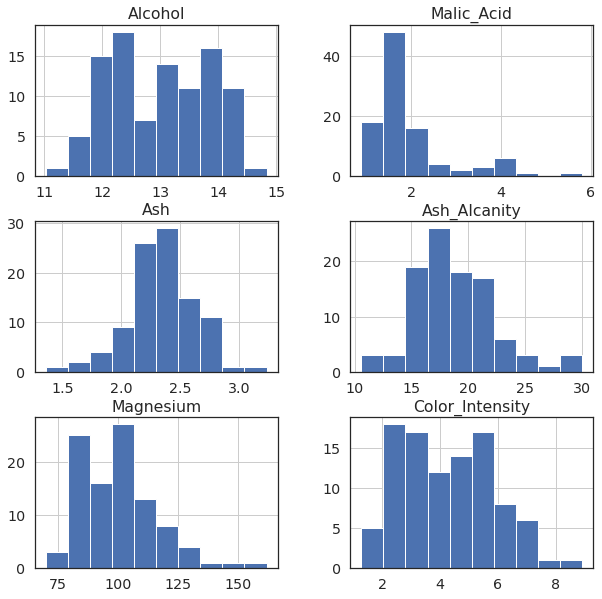

In [18]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(10,10)})
ax=df.hist()

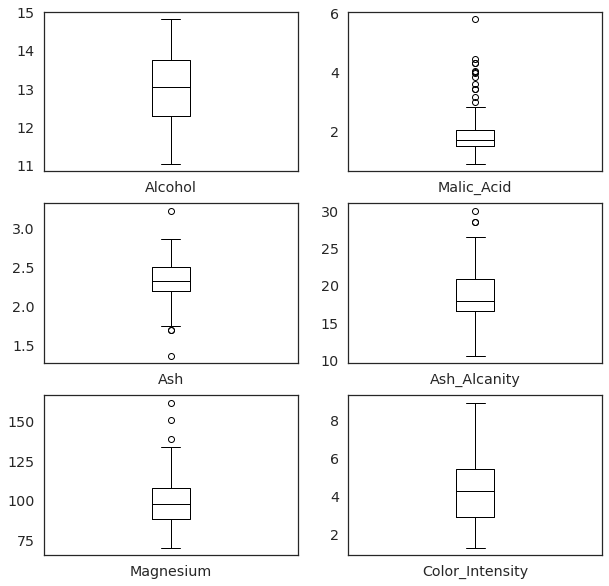

In [20]:
df.plot(kind = 'box', subplots = True, layout = (3,2), sharex = False, sharey = False,color='black')
plt.show()

# Paso 2: Estandarice y genere una nueva escala
¿Recuerda lo comentado respecto a que manejar distintas escalas puede estropear nuestra clusterización? Aunque tengamos menos variables, sucede lo mismo. Genere una nueva escala y estandarice los datos.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # instantiate standarizer
df_cluster = df.copy() # create a copy of data
df_cluster[df_cluster.columns] = scaler.fit_transform(df_cluster) # fit and normalize data and fill cluster data

In [23]:
df_cluster.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Color_Intensity
count,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,3.266186e-16,-2.467162e-16,2.893308e-16,1.099009e-16,1.382172e-16,-1.917658e-16
std,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00
min,-2.270530e+00,-1.209714e+00,-3.506035e+00,-2.360743e+00,-1.946823e+00,-1.870077e+00
25%,-8.073595e-01,-5.190859e-01,-5.190579e-01,-6.403474e-01,-7.946350e-01,-8.512133e-01
50%,7.518778e-02,-2.813288e-01,-7.190569e-02,-2.210914e-01,-1.545303e-01,-2.159956e-03
75%,8.822541e-01,1.092722e-01,5.898796e-01,6.174205e-01,4.855743e-01,7.305416e-01
max,2.142206e+00,4.349274e+00,3.183362e+00,3.248613e+00,3.942139e+00,2.922357e+00


# Paso 3: Ahora reduzca de 6 a solo 2 dimensiones
importe PCA de sklearn.decomposition y genere 2 nuevas dimensiones que "resuman" a las 6 originales

In [24]:
from sklearn.decomposition import PCA

pca_2 = PCA(2) # instantiate PCA for first 2 components
pca_res = pca_2.fit_transform(df_cluster) # fit PCA with normalized data

In [26]:
print(f"Cumulative explained variance {np.sum(pca_2.explained_variance_ratio_):.2f}")

Cumulative explained variance 0.63


# Paso 4: Grafique las dos dimensiones que acaba de generar

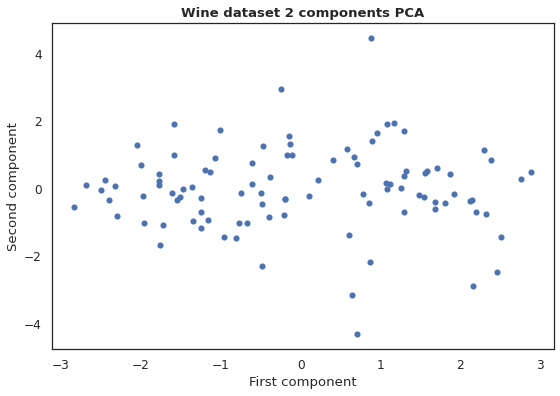

In [27]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_res[:, 0], y=pca_res[:, 1], lw=0.1)
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Wine dataset 2 components PCA", fontweight='bold')
plt.show()

# Paso 5: Decida cuantos clusters usted necesita
Ahora, usted deberá emplear uno de los métodos que el Experto le ha enseñado:
- Método del Codo
- Método de la Silueta
- Método de la inercia

Con base en él, escriba el código pertinente y argumente su decisión de número de clusters

- CONSEJO: Le será confuso elegir con un solo método. Le recomiendo ampliamente usar dos.

- Interia (elbow method)
- Score (silhouette method)

In [42]:
from tqdm import tqdm

import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score

inertia = []; silhouette = []
for i in tqdm(range(2, 10)):
  kmeans = cluster.KMeans(n_clusters=i, n_init=15, max_iter=500, random_state=123)
  kmeans.fit(df_cluster)
  inertia.append(kmeans.inertia_)
  silhouette.append(silhouette_score(df_cluster, kmeans.labels_, metric="euclidean"))

100%|██████████| 8/8 [00:00<00:00, 16.59it/s]


# Paso 6: Gráfique el método que empleó
Junto con Matplotlib y Seaborn (si es el caso), grafique el método de decisión de Clusters que usted usó en el paso anterior

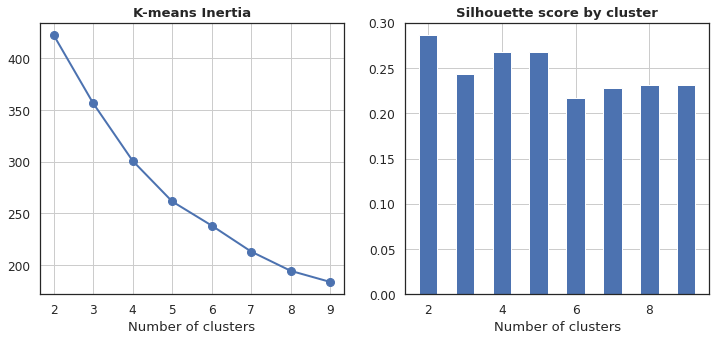

In [43]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

# when plot, we start at 2 clusters, but index 0

plt.plot(range(2, len(inertia)+2), inertia, marker='o', lw=2, ms=8)
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(2, len(silhouette)+2), silhouette, align='center', width=0.5)
plt.grid()
plt.xlabel("Number of clusters")
plt.title("Silhouette score by cluster", fontweight='bold');

# Paso 7: Defina su clusterización
Ahora, usted deberá emplear el número de clusters que decidió en el paso anterior con base en el ejemplo desarrollado por el experto. 
- Recuerde definir una nueva variable donde almacenará KMeans()
- Defina una segunda variable donde almacene sus centrodes, derivado de la primera (.cluster_centers_)

In [44]:
K = 2 # number of clusters selected
kmeans = cluster.KMeans(n_clusters=K, random_state=123) # k-means with desired clusters
kmeans_labels = kmeans.fit_predict(df_cluster) # fit kmeans

centroids = kmeans.cluster_centers_ # get centroids
centroids_pca = pca_2.transform(centroids)

results = pd.Series(kmeans_labels)
results.value_counts()

0    54
1    45
dtype: int64

# Paso 8: Genere un breve EDA de sus variables clusterizadas
Puede generar histogramas o distintas visualizaciones de sus variabels clusterizadas. Paso libre

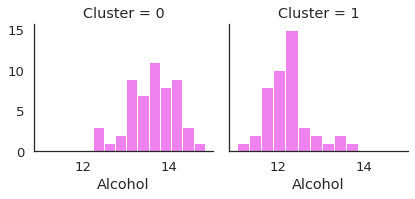

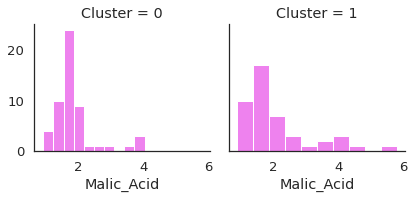

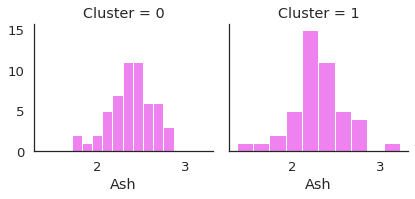

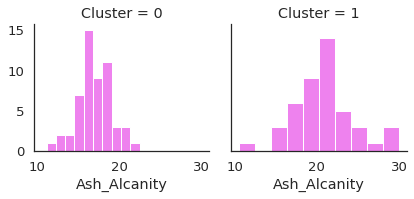

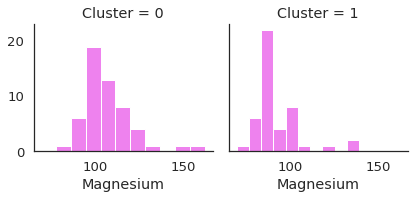

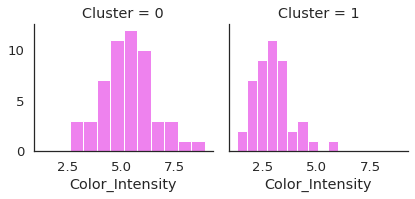

In [50]:
data2 = df.copy()
data2['Cluster'] = kmeans_labels

data_list = data2.columns.tolist()

for cluster_data in data_list[:-1]:
    grid = sns.FacetGrid(data2, col="Cluster")
    grid.map(plt.hist, cluster_data, color= "violet")

# Paso 9: Visualice los clusters en el plano cartesiano
Genere una visualización de los clusters que usted decidió emplear dada la reducción de dimensiones y los clusters que generó

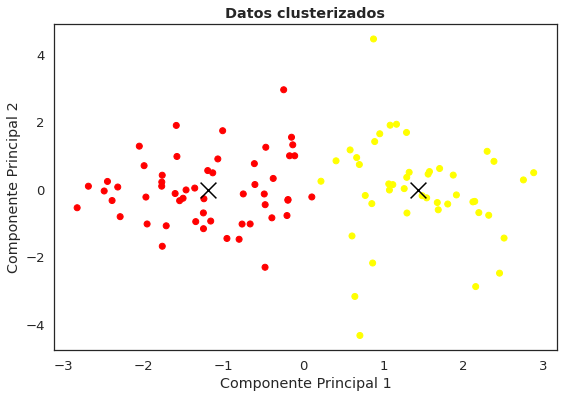

In [46]:
sns.set(style="white",rc={'figure.figsize':(9,6)}, font_scale =1.2)

plt.scatter(x=pca_res[:,0], y=pca_res[:,1], c=kmeans_labels, cmap ="autumn")
plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            marker = "x", color = "black", s=250)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Datos clusterizados", fontweight='bold')
plt.show()